In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec

from konlpy.tag import Okt
from konlpy.tag import Mecab
from khaiii import KhaiiiApi

import numpy as np
from collections import Counter
import re
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from wordcloud import WordCloud
from PIL import ImageFont, ImageDraw

import matplotlib.pyplot as plt

from matplotlib import font_manager



font = ImageFont.truetype('/Users/seop/나눔 글꼴/나눔손글씨_펜/NanumPen.ttf', 30)



In [2]:
# 재해개요 Data Load
df = pd.read_excel("/Users/seop/Desktop/3-2/연구실/제조업 화재. 폭발사고 데이터(1.819건) (1).xlsx")
df


,연번,기준연월,발생형태_소,재해개요
0,43,201212,화재,주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징...
1,120,201212,폭발·파열,[비보고 사유] 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 파...
2,197,201212,폭발·파열,[비보고 사유] 재해 발생시 산업재해발생 보고를 해야 한다는 사실을 알지 못함 [조...
3,394,201212,폭발·파열,[비보고 사유] 재해자가 본인 실수로 다쳤으므로 본인이 알아서 한다고 하여 방치한 ...
4,478,201212,폭발·파열,[비보고 사유] 공상처리 [조사자 견해] 유성기업(주)에서 제출한 공상처리 내역 및...
...,...,...,...,...
1814,495010,201712,화재,상기일 상기인 호스를 연결하기 위해 녹이는 과정에서 사고가 발생.(신나에 불이 옮겨...
1815,495567,201712,화재,12월 07일 오전07시경 제품(무거리) 보관용기로 사용하기 위해 폐드럼통 뚜껑 산...
1816,495930,201712,폭발·파열,2017년 12월 12일 14시 48분경 회사 공장동에서 기계시운전을 하면서 온도상...
1817,496127,201712,화재,2017년 12월 18일 13시경 부산시 강서구 송정동 소재 부광화학공업(주) 본공...


In [3]:
# 불용어 정의
df_stopwords = pd.read_excel('stopwords.xlsx')
df_stopwords

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
1142,확인
1143,응급
1144,이용
1145,직원


In [4]:
# 카카오에서 개발한 형태소 분석기 KhaiiiApi
api = KhaiiiApi()
sentence_list = []
morphs_list = []
sort_name = '화재'
df = pd.read_excel("/Users/seop/Desktop/3-2/연구실/제조업 화재. 폭발사고 데이터(1.819건) (1).xlsx")
df = df[df['발생형태_소']==sort_name]
# 폭발·파열
df_stopwords = pd.read_excel('stopwords.xlsx')
stopwords = list(df_stopwords['불용어'])


            
df.reset_index(drop=True,inplace=True)
# for s in sentence_list:
#     print(s)
#     print()
# print(sentence_list[0])
# len(sentence_list)

In [5]:
morphs_list = []
sentence_nouns_list = []
one = []
api = KhaiiiApi()
i = 1
# 모든 문장에서 명사만 추출
for sentence in df.get("재해개요"):
#     print(sentence)
    morphs_value = []
    
    for word in api.analyze(sentence):
        for morph in word.morphs:
            if morph.tag == 'NNG' and morph.lex not in stopwords: # 명사 추출, 불용어 제거
                if len(morph.lex) == 1:
                    morph.lex = morph.lex+'_'
                    one.append(morph.lex)
                morphs_list.append(morph.lex)

                morphs_value.append(morph.lex)
    sentence_nouns_list.append(morphs_value) # 각 문장별 명사 리스트 구별

    i+=1
morphs_list # 행 구분 없이 전체 단어 리스트 
print(sentence_nouns_list) # 행 구분한 전체 단어 리스트 


[['주조', '사업', '가우징', '안쪽', '소착', '제거', '기계', '불똥', '내경', '단차부위', '점퍼', '방독마스크', '용접면', '인지', '왼쪽팔', '가슴', '화상'], ['사유', '치료', '병원비', '회사', '지급', '퇴원', '복귀', '생각', '보고', '조사자', '견해', '지침', '감독관', '집무', '규정', '경고', '조치', '코_', '생산라인', '현장', '목적', '수지게이트', '노즐', '구멍', '오픈', '휴대', '토치', '내용', '토치', '기계모서리', '원재료', '재해발생', '팔목', '팔꿈치', '사이', '화상'], ['사유', '개인', '휴가', '개인', '생각', '산재', '처리', '조사자', '견해', '산재', '처리', '사유서', '산업재해조사표', '진단서', '의거', '고의', '판단', '이전', '조치', '기준', '의거', '요양', '기준', '미만', '최근', '이내', '동일', '사안', '위반', '내역', '경고', '처분', '종결', '코_', '구성면', '소재', '냇가', '목적', '고기', '가스', '기기', '내용', '점화', '가스', '호스', '연결', '상태', '호스애', '화상'], ['이하', '공사', '관계', '산재', '처리', '조사자', '견해', '산재', '처리', '진단서', '고의', '판단', '조치', '기준', '의거', '요양', '기간', '미만', '최근', '동일', '사안', '위반', '내역', '한래', '경고', '처분', '종결', '코_', '공사', '현장', '목적', '공단', '업체', '내용', '진화', '사유', '업체', '유화', '물질', '화상'], ['사유', '최초', '통원', '치료', '진단', '가료', '상처', '부위', '치료', '조사자', '견해', '최초', '의사', '소견상', '단순', '치료', '진단',

In [6]:
print(morphs_list)

['주조', '사업', '가우징', '안쪽', '소착', '제거', '기계', '불똥', '내경', '단차부위', '점퍼', '방독마스크', '용접면', '인지', '왼쪽팔', '가슴', '화상', '사유', '치료', '병원비', '회사', '지급', '퇴원', '복귀', '생각', '보고', '조사자', '견해', '지침', '감독관', '집무', '규정', '경고', '조치', '코_', '생산라인', '현장', '목적', '수지게이트', '노즐', '구멍', '오픈', '휴대', '토치', '내용', '토치', '기계모서리', '원재료', '재해발생', '팔목', '팔꿈치', '사이', '화상', '사유', '개인', '휴가', '개인', '생각', '산재', '처리', '조사자', '견해', '산재', '처리', '사유서', '산업재해조사표', '진단서', '의거', '고의', '판단', '이전', '조치', '기준', '의거', '요양', '기준', '미만', '최근', '이내', '동일', '사안', '위반', '내역', '경고', '처분', '종결', '코_', '구성면', '소재', '냇가', '목적', '고기', '가스', '기기', '내용', '점화', '가스', '호스', '연결', '상태', '호스애', '화상', '이하', '공사', '관계', '산재', '처리', '조사자', '견해', '산재', '처리', '진단서', '고의', '판단', '조치', '기준', '의거', '요양', '기간', '미만', '최근', '동일', '사안', '위반', '내역', '한래', '경고', '처분', '종결', '코_', '공사', '현장', '목적', '공단', '업체', '내용', '진화', '사유', '업체', '유화', '물질', '화상', '사유', '최초', '통원', '치료', '진단', '가료', '상처', '부위', '치료', '조사자', '견해', '최초', '의사', '소견상', '단순', '치료', '진단', '치료', '화

In [7]:
nouns_counter = Counter(morphs_list)
top_nouns = dict(nouns_counter.most_common(900))

In [8]:
sentence_list = []
for sentence in sentence_nouns_list:
    sentence_list.append(' '.join(sentence))


# CountVectorizer 기반 인접행렬 만들기

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(
                         min_df = 5 # 최소 단어 등장 횟수
                        )
sp_mat = countv.fit_transform(sentence_list)


# 희소행렬을 np array로
count_df = pd.DataFrame(sp_mat.toarray(),columns = countv.get_feature_names())
count_df

/Users/seop/opt/anaconda3/envs/aaa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,가공,가공동,가동,가량,가스,가스통,가슴,가열,개방,개폐,...,확인차,환자,회사,회전,후송,휘발,휘발유,휴대,휴식,흡입
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
970,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## countvetor 행 단어의 총 빈도수 구하기

In [41]:
# count Vector 기반 동시 단어 행렬
count_df_transpose = count_df.transpose()
count_df_transpose # 전치 행렬
count_term_document_matrix = count_df_transpose.dot(count_df) # 행렬 * 전치행렬
count_term_document_matrix # 동시 단어 행렬

,가공,가공동,가동,가량,가스,가스통,가슴,가열,개방,개폐,...,확인차,환자,회사,회전,후송,휘발,휘발유,휴대,휴식,흡입
가공,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가공동,0,5,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
가동,1,0,41,5,0,0,3,0,5,0,...,5,0,0,1,0,0,0,0,0,1
가량,0,0,5,5,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
가스,0,0,0,0,133,6,1,6,13,0,...,0,1,10,0,4,2,0,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
휘발,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
휘발유,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,16,0,0,0
휴대,0,0,0,0,7,1,0,0,0,0,...,0,0,4,0,1,0,0,5,0,0
휴식,0,0,0,0,0,0,0,0,0,0,...,4,3,2,0,4,0,0,0,16,4


In [42]:
count_term_document_matrix['빈도수'] = 1
for i in count_term_document_matrix.index:
    count_term_document_matrix.loc[i]['빈도수'] = nouns_counter[i]


In [43]:
count_term_document_matrix

,가공,가공동,가동,가량,가스,가스통,가슴,가열,개방,개폐,...,환자,회사,회전,후송,휘발,휘발유,휴대,휴식,흡입,빈도수
가공,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
가공동,0,5,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,5
가동,1,0,41,5,0,0,3,0,5,0,...,0,0,1,0,0,0,0,0,1,17
가량,0,0,5,5,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,5
가스,0,0,0,0,133,6,1,6,13,0,...,1,10,0,4,2,0,7,0,3,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
휘발,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,8
휘발유,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,16,0,0,0,14
휴대,0,0,0,0,7,1,0,0,0,0,...,0,4,0,1,0,0,5,0,0,5
휴식,0,0,0,0,0,0,0,0,0,0,...,3,2,0,4,0,0,0,16,4,14


# CountVectorizer 기반 Clustering, Wordcloud

In [44]:
tsne = TSNE(random_state=0,
             learning_rate = 50,
             n_components = 2)
tsne_features = tsne.fit_transform(count_df)

/Users/seop/opt/anaconda3/envs/aaa/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


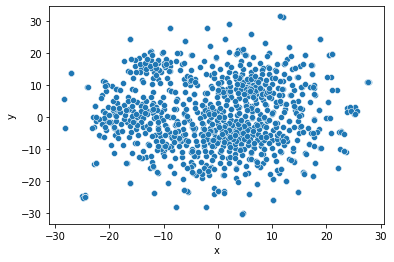

In [45]:
df_tsne = pd.DataFrame()
df_tsne['x'] = tsne_features[:,0]
df_tsne['y'] = tsne_features[:,1]
sns.scatterplot(x="x",y="y",data = df_tsne)
plt.show()

In [46]:
df_tsne

,x,y
0,6.347127,-0.131039
1,-4.460447,-4.122516
2,17.585365,-18.443750
3,17.604500,-18.454203
4,-3.998757,-18.120209
...,...,...
968,4.277801,-0.957673
969,-1.731795,-5.088234
970,3.241236,-12.792738
971,-2.150028,-27.919580


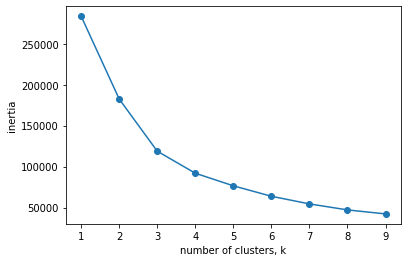

In [47]:
ks = range(1,10)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(tsne_features)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [48]:
count_df

,가공,가공동,가동,가량,가스,가스통,가슴,가열,개방,개폐,...,확인차,환자,회사,회전,후송,휘발,휘발유,휴대,휴식,흡입
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
970,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


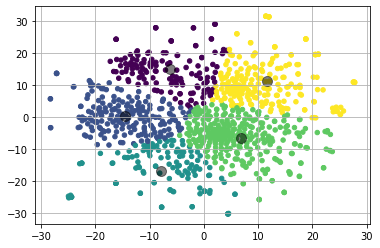

In [49]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(tsne_features)

y_kmeans = kmeans.predict(tsne_features)
y_kmeans[0:10] # 군집화 된 결과

plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()


In [50]:
df_tsne

,x,y
0,6.347127,-0.131039
1,-4.460447,-4.122516
2,17.585365,-18.443750
3,17.604500,-18.454203
4,-3.998757,-18.120209
...,...,...
968,4.277801,-0.957673
969,-1.731795,-5.088234
970,3.241236,-12.792738
971,-2.150028,-27.919580


# Word2Vec

In [51]:
model = Word2Vec(sentences = sentence_nouns_list,
                 vector_size=800, # 차원 
                 window=5, # 훈련시 앞 뒤로 고려하는 단어의 개수
                 min_count=5, # 해당 빈도수 보다 작게 등장한 단어의 경우 모델 학습 배제
                 sg=1, # skip-gram
                 workers = 4, # 모델을 만들때 스레드 개수 
                 sample = 1e-3) # 전체 데이터에서 많이 등장하는 단어는 그만큼 학습 기회가 많으므로 이런 학습량을 확률적인 방식으로 줄이기 위한 변수
model.wv.vectors.shape
model.init_sims()

/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/4230547241.py:9: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims()


In [52]:
word_embeddings = pd.DataFrame(model.wv.vectors[:, :], index=model.wv.index_to_key[:])
word_embeddings

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
화상,-0.080020,0.012578,-0.002830,-0.039103,0.001752,-0.013212,-0.025132,0.046393,0.019259,-0.010096,...,0.029787,-0.051287,-0.041297,-0.003954,0.006782,0.043995,-0.010183,0.057705,0.069882,0.059468
용접,-0.079352,0.014158,-0.000921,-0.037225,0.004702,-0.010963,-0.022932,0.042872,0.020442,-0.009573,...,0.029069,-0.048722,-0.042222,-0.006248,0.007604,0.046204,-0.008305,0.058845,0.067682,0.058617
소재,-0.078559,0.009943,-0.002490,-0.039387,0.004622,-0.011115,-0.026004,0.044813,0.020465,-0.009561,...,0.030640,-0.050983,-0.040494,-0.005880,0.006979,0.045814,-0.008584,0.057876,0.068688,0.060298
옷_,-0.076672,0.011263,-0.002153,-0.038561,0.002154,-0.012621,-0.022809,0.043052,0.018856,-0.009875,...,0.029795,-0.047913,-0.039402,-0.005105,0.007441,0.041583,-0.010836,0.055913,0.065526,0.055646
불꽃,-0.079330,0.011962,-0.003570,-0.040205,0.003536,-0.012099,-0.026120,0.045520,0.022132,-0.010265,...,0.030395,-0.050794,-0.041689,-0.005317,0.008127,0.045974,-0.011116,0.059453,0.068960,0.059636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
연소,-0.064665,0.009632,-0.002765,-0.032016,0.001631,-0.010419,-0.022439,0.037554,0.016425,-0.007328,...,0.024255,-0.043041,-0.032706,-0.003833,0.005563,0.037788,-0.009759,0.048910,0.055978,0.048363
열기,-0.050983,0.007618,-0.003001,-0.025520,0.001545,-0.006858,-0.016476,0.029142,0.012504,-0.005795,...,0.019314,-0.033255,-0.025537,-0.002003,0.005409,0.027284,-0.007865,0.037875,0.043876,0.037748
투입구,-0.054288,0.008228,-0.002223,-0.027686,0.002450,-0.007707,-0.019268,0.031080,0.014997,-0.004978,...,0.021585,-0.035282,-0.027452,-0.003885,0.004388,0.030416,-0.007906,0.040102,0.047195,0.041973
노출,-0.049679,0.008050,-0.001206,-0.025875,0.003334,-0.007999,-0.016437,0.028914,0.011871,-0.006730,...,0.017670,-0.032344,-0.024541,-0.002451,0.003648,0.027653,-0.007411,0.037185,0.042816,0.038201


In [53]:
# target과 가장 유사한 단어 뽑기 (결과가 잘 나오는것 을 알수 있음)

target = '알콜'
print(model.wv.most_similar(target,topn=10))


[('양손', 0.9996662139892578), ('보수', 0.9996640682220459), ('제품', 0.9996552467346191), ('허벅지', 0.9996496438980103), ('요양', 0.9996467232704163), ('안면', 0.9996433854103088), ('폭발', 0.9996404647827148), ('신너', 0.9996371865272522), ('체결', 0.9996352791786194), ('장치', 0.9996324777603149)]


In [54]:
tsne = TSNE(random_state=0,
            learning_rate = 50,
            n_components = 2 # 2차원
           )
tsne_points = tsne.fit_transform(word_embeddings.values)

/Users/seop/opt/anaconda3/envs/aaa/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [55]:
tsne_df = pd.DataFrame(tsne_points, index=word_embeddings.index, columns=['x_coord', 'y_coord'])
tsne_df['word'] = tsne_df.index


In [56]:
# 여기에 Word2Vec network 시각화 

word_embeddings

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
화상,-0.080020,0.012578,-0.002830,-0.039103,0.001752,-0.013212,-0.025132,0.046393,0.019259,-0.010096,...,0.029787,-0.051287,-0.041297,-0.003954,0.006782,0.043995,-0.010183,0.057705,0.069882,0.059468
용접,-0.079352,0.014158,-0.000921,-0.037225,0.004702,-0.010963,-0.022932,0.042872,0.020442,-0.009573,...,0.029069,-0.048722,-0.042222,-0.006248,0.007604,0.046204,-0.008305,0.058845,0.067682,0.058617
소재,-0.078559,0.009943,-0.002490,-0.039387,0.004622,-0.011115,-0.026004,0.044813,0.020465,-0.009561,...,0.030640,-0.050983,-0.040494,-0.005880,0.006979,0.045814,-0.008584,0.057876,0.068688,0.060298
옷_,-0.076672,0.011263,-0.002153,-0.038561,0.002154,-0.012621,-0.022809,0.043052,0.018856,-0.009875,...,0.029795,-0.047913,-0.039402,-0.005105,0.007441,0.041583,-0.010836,0.055913,0.065526,0.055646
불꽃,-0.079330,0.011962,-0.003570,-0.040205,0.003536,-0.012099,-0.026120,0.045520,0.022132,-0.010265,...,0.030395,-0.050794,-0.041689,-0.005317,0.008127,0.045974,-0.011116,0.059453,0.068960,0.059636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
연소,-0.064665,0.009632,-0.002765,-0.032016,0.001631,-0.010419,-0.022439,0.037554,0.016425,-0.007328,...,0.024255,-0.043041,-0.032706,-0.003833,0.005563,0.037788,-0.009759,0.048910,0.055978,0.048363
열기,-0.050983,0.007618,-0.003001,-0.025520,0.001545,-0.006858,-0.016476,0.029142,0.012504,-0.005795,...,0.019314,-0.033255,-0.025537,-0.002003,0.005409,0.027284,-0.007865,0.037875,0.043876,0.037748
투입구,-0.054288,0.008228,-0.002223,-0.027686,0.002450,-0.007707,-0.019268,0.031080,0.014997,-0.004978,...,0.021585,-0.035282,-0.027452,-0.003885,0.004388,0.030416,-0.007906,0.040102,0.047195,0.041973
노출,-0.049679,0.008050,-0.001206,-0.025875,0.003334,-0.007999,-0.016437,0.028914,0.011871,-0.006730,...,0.017670,-0.032344,-0.024541,-0.002451,0.003648,0.027653,-0.007411,0.037185,0.042816,0.038201


# Word2Vec K-means Clustering, Wordcloud

In [57]:
tsne2 = TSNE(random_state=0,
             learning_rate = 50,
             n_components = 2)
tsne2_features = tsne2.fit_transform(word_embeddings)

/Users/seop/opt/anaconda3/envs/aaa/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [58]:
tsne2_features

array([[-17.521421  ,   0.09339827],
       [-13.020496  ,  -6.8172407 ],
       [-15.441677  ,  -4.2266455 ],
       ...,
       [ 22.828716  ,  14.68585   ],
       [ 22.398771  ,  20.560019  ],
       [ 22.96622   ,  17.168285  ]], dtype=float32)

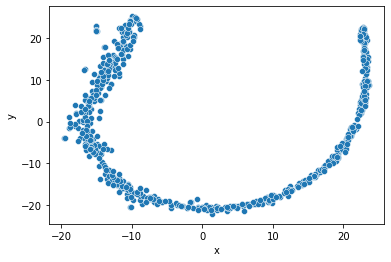

In [59]:
df_tsne2 = pd.DataFrame()
df_tsne2['x'] = tsne2_features[:,0]
df_tsne2['y'] = tsne2_features[:,1]
sns.scatterplot(x="x",y="y",data = df_tsne2)
plt.show()

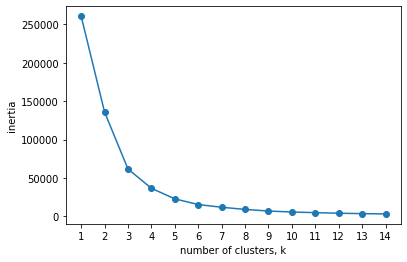

In [61]:
ks = range(1,15)

inertias = []

for k in ks:
    model2 = KMeans(n_clusters=k)
    model2.fit(tsne2_features)
    inertias.append(model2.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


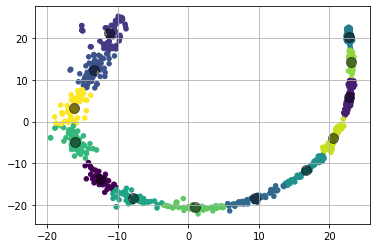

In [62]:
n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(tsne2_features)

y_kmeans = kmeans.predict(tsne2_features)
y_kmeans[0:10] # 군집화 된 결과

plt.scatter(np.array(tsne2_features)[:,0], np.array(tsne2_features)[:,1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()


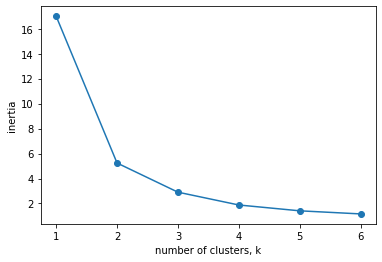

In [63]:
ks = range(1,7)

inertias = []

for k in ks:
    model2 = KMeans(n_clusters=k)
    model2.fit(word_embeddings)
    inertias.append(model2.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.show()


In [72]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(word_embeddings)

y_kmeans = kmeans.predict(word_embeddings)
y_kmeans[0:10] # 군집화 된 결과

# plt.scatter(np.array(tsne2_features)[:,0], np.array(tsne2_features)[:,1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
# plt.grid()
# plt.show()


/Users/seop/opt/anaconda3/envs/aaa/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/seop/opt/anaconda3/envs/aaa/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [73]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
k_means_cluster_label = {}
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['재해개요'].iloc[idx]]
    else:
        clustered_dic[i].append(df['재해개요'].iloc[idx])
    if i not in k_means_cluster_label:
        k_means_cluster_label[i] = [df["연번"].iloc[idx]]
    else:
        k_means_cluster_label[i].append(df["연번"].iloc[idx])
clustered_dic

k_means_cluster_label_list = []
for i in k_means_cluster_label.items():
    k_means_cluster_label_list.append(i[1])


# 클러스터링이 된 패키지들
# 20개의 군집으로 생성
clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_count'] = cluster_num
df_cluster['cluster_label'] = k_means_cluster_label_list
df_cluster

,num,clusters,cluster_count,cluster_label
0,0,[2012.04.06(금) 탄소섬유 공정 중 섬유를 전기히터를 통해 열풍으로 가열하...,30,"[43, 1388, 3112, 7286, 7567, 8328, 9571, 12264..."
1,1,"[작업,세척시 스파크에 의해서 일어난것 같습니다. (창문고리 도장업체로 도장전 기름...",41,"[636, 672, 1973, 4276, 5940, 8527, 11401, 1333..."
2,2,[2013년 08월 11일 오후 2시 20분경 경남 진주시 진성면 가진리 1555번...,23,"[963, 3294, 9912, 22843, 25774, 42577, 46663, ..."
3,3,[[비보고 사유] 약 10일간의 입원치료로서 병원비를 회사에서 지급하였고 퇴원 후 ...,50,"[5113, 5927, 8017, 8391, 11171, 13224, 16036, ..."
4,4,[합동폐차산업(주) 내 생산동 작업장에서 폐자동차(코란도)하체 해체 작업과정에서 연...,39,"[9084, 10655, 11409, 11593, 11605, 12237, 1471..."
5,5,[1)사고일시:2012년 1월 16일 04시경(중국 현지시간)\n2)장소: 중국 강...,17,"[10759, 42364, 48391, 101403, 103277]"
6,6,[상기인은 2012년 10월8일 18시30분경 MBTA 작업장(용접공장 3Bay 라...,41,"[13071, 22194, 36037, 38086, 40594, 40730, 432..."
7,7,[2013.11.13일 수요일 오전 9시경 현장에서 부상자 MET MAN(멧만)과 ...,16,"[16031, 34280]"
8,8,[2013년 9월 23일 12시 50분경 영광금속 사업장내에서 세척제품을 탈수작업도...,19,"[27866, 34484, 47214, 48308, 53774, 53935, 597..."
9,9,[2012년 01월05일 03시경 합형반에 주입완료된 주물제품(MBS K98MC-C...,5,"[29777, 50585, 53922, 59717, 59718, 61469, 664..."


In [74]:
# dbscan = DBSCAN(eps = 1.1, min_samples=5)
# # ss = StandardScaler()
# scaled_df = pd.DataFraㅃme(pd.DataFrame(X.toarray()))
# # dbscan = DBSCAN(eps = 0.5)
# dbscan_cluster = dbscan.fit_predict(tsne_df)
# dbscan_cluster

In [75]:
centers = kmeans.cluster_centers_ # 각 군집의 중심점
pred = kmeans.predict(word_embeddings) # 각 예측군집
print(pd.DataFrame(centers))
print(pred[:10])


         0         1         2         3         4         5         6    \
0  -0.073760  0.011768 -0.003099 -0.037344  0.003147 -0.010548 -0.024399   
1  -0.082543  0.012776 -0.003096 -0.041522  0.003574 -0.011920 -0.026994   
2  -0.058037  0.009082 -0.002776 -0.029741  0.002500 -0.007809 -0.019043   
3  -0.078968  0.011990 -0.003107 -0.039511  0.003575 -0.011366 -0.025448   
4  -0.068733  0.010679 -0.003030 -0.034890  0.002683 -0.009831 -0.022487   
5  -0.086836  0.013399 -0.002812 -0.044276  0.003892 -0.012072 -0.028632   
6  -0.065722  0.010119 -0.002699 -0.033257  0.003042 -0.009434 -0.021493   
7  -0.053819  0.008078 -0.002378 -0.026746  0.002558 -0.007875 -0.017264   
8  -0.049900  0.007566 -0.002059 -0.025529  0.002256 -0.007252 -0.016499   
9  -0.086153  0.016815 -0.013707 -0.049100 -0.000119 -0.011584 -0.031868   
10 -0.075958  0.011829 -0.003030 -0.038452  0.003293 -0.011043 -0.024689   
11 -0.071364  0.011047 -0.002996 -0.035933  0.003108 -0.010132 -0.023132   
12 -0.063523

/Users/seop/opt/anaconda3/envs/aaa/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [76]:
word_embeddings['cluster'] = pred
word_embeddings

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,cluster
화상,-0.080020,0.012578,-0.002830,-0.039103,0.001752,-0.013212,-0.025132,0.046393,0.019259,-0.010096,...,-0.051287,-0.041297,-0.003954,0.006782,0.043995,-0.010183,0.057705,0.069882,0.059468,16
용접,-0.079352,0.014158,-0.000921,-0.037225,0.004702,-0.010963,-0.022932,0.042872,0.020442,-0.009573,...,-0.048722,-0.042222,-0.006248,0.007604,0.046204,-0.008305,0.058845,0.067682,0.058617,3
소재,-0.078559,0.009943,-0.002490,-0.039387,0.004622,-0.011115,-0.026004,0.044813,0.020465,-0.009561,...,-0.050983,-0.040494,-0.005880,0.006979,0.045814,-0.008584,0.057876,0.068688,0.060298,3
옷_,-0.076672,0.011263,-0.002153,-0.038561,0.002154,-0.012621,-0.022809,0.043052,0.018856,-0.009875,...,-0.047913,-0.039402,-0.005105,0.007441,0.041583,-0.010836,0.055913,0.065526,0.055646,10
불꽃,-0.079330,0.011962,-0.003570,-0.040205,0.003536,-0.012099,-0.026120,0.045520,0.022132,-0.010265,...,-0.050794,-0.041689,-0.005317,0.008127,0.045974,-0.011116,0.059453,0.068960,0.059636,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
연소,-0.064665,0.009632,-0.002765,-0.032016,0.001631,-0.010419,-0.022439,0.037554,0.016425,-0.007328,...,-0.043041,-0.032706,-0.003833,0.005563,0.037788,-0.009759,0.048910,0.055978,0.048363,6
열기,-0.050983,0.007618,-0.003001,-0.025520,0.001545,-0.006858,-0.016476,0.029142,0.012504,-0.005795,...,-0.033255,-0.025537,-0.002003,0.005409,0.027284,-0.007865,0.037875,0.043876,0.037748,8
투입구,-0.054288,0.008228,-0.002223,-0.027686,0.002450,-0.007707,-0.019268,0.031080,0.014997,-0.004978,...,-0.035282,-0.027452,-0.003885,0.004388,0.030416,-0.007906,0.040102,0.047195,0.041973,19
노출,-0.049679,0.008050,-0.001206,-0.025875,0.003334,-0.007999,-0.016437,0.028914,0.011871,-0.006730,...,-0.032344,-0.024541,-0.002451,0.003648,0.027653,-0.007411,0.037185,0.042816,0.038201,8


# setting cluster number

/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 22 nodes and 36 edges
Graph with 40 nodes and 350 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 5 nodes and 4 edges
Graph with 49 nodes and 393 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 29 nodes and 30 edges
Graph with 15 nodes and 30 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 28 nodes and 29 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  pos = nx.spring_layout(g,weight='count',k=1*1/np.sqrt(len(g.nodes())), iterations=50)
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Graph with 0 nodes and 0 edges
Graph with 4 nodes and 2 edges
Graph with 5 nodes and 10 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 59 nodes and 292 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 31 nodes and 41 edges
Graph with 11 nodes and 10 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 42 nodes and 327 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 11 nodes and 15 edges
Graph with 2 nodes and 1 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 43 nodes and 372 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


Graph with 5 nodes and 3 edges
Graph with 2 nodes and 1 edges
Graph with 2 nodes and 1 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/3465715926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


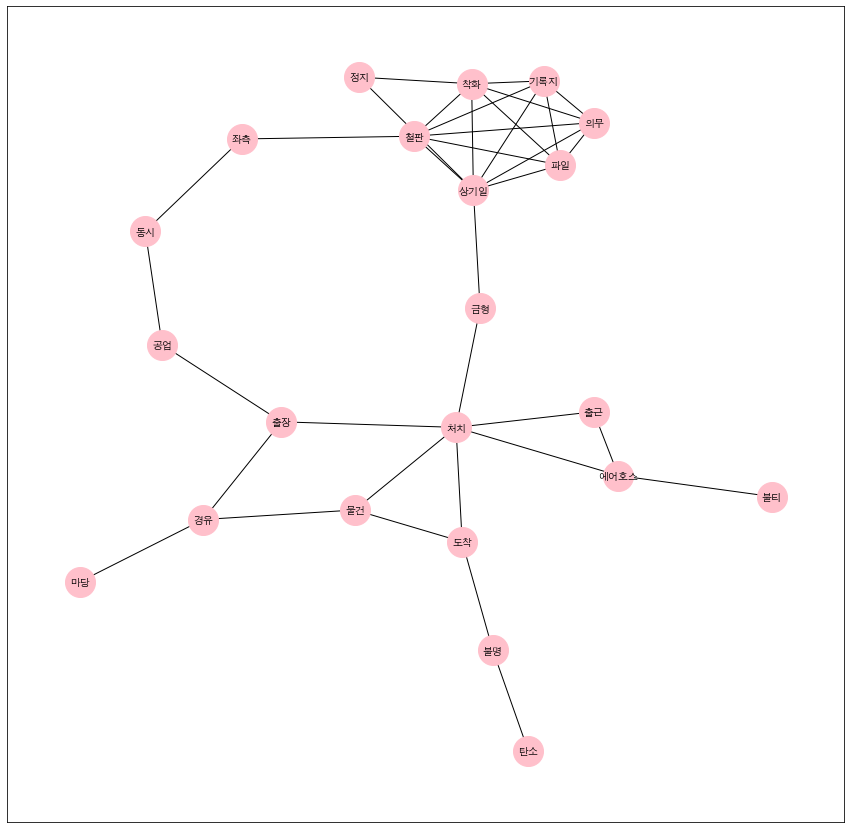

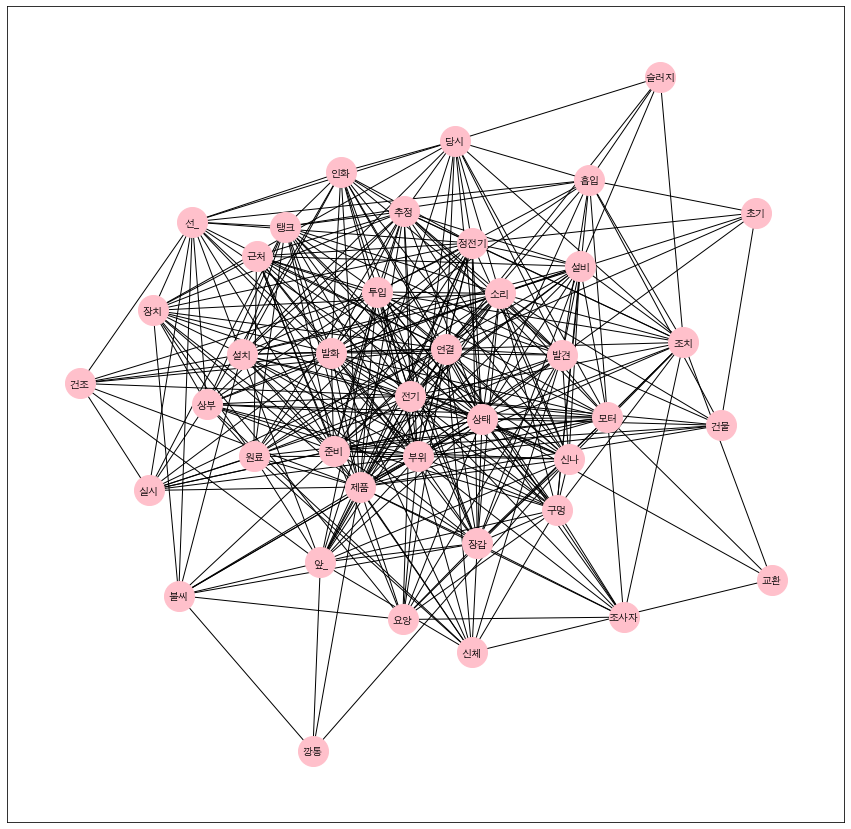

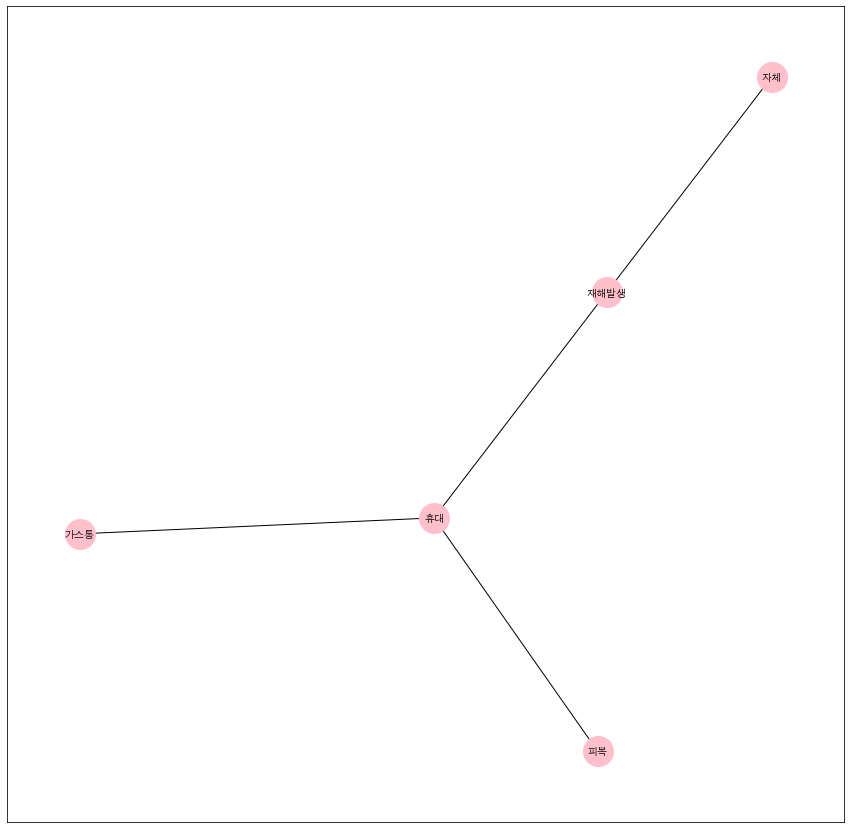

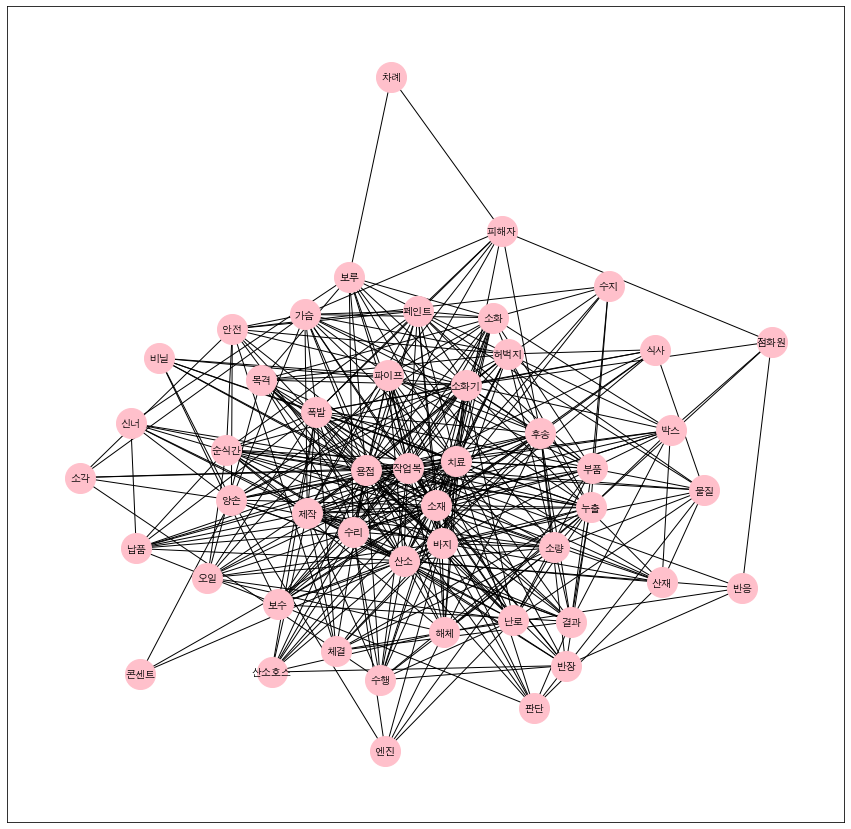

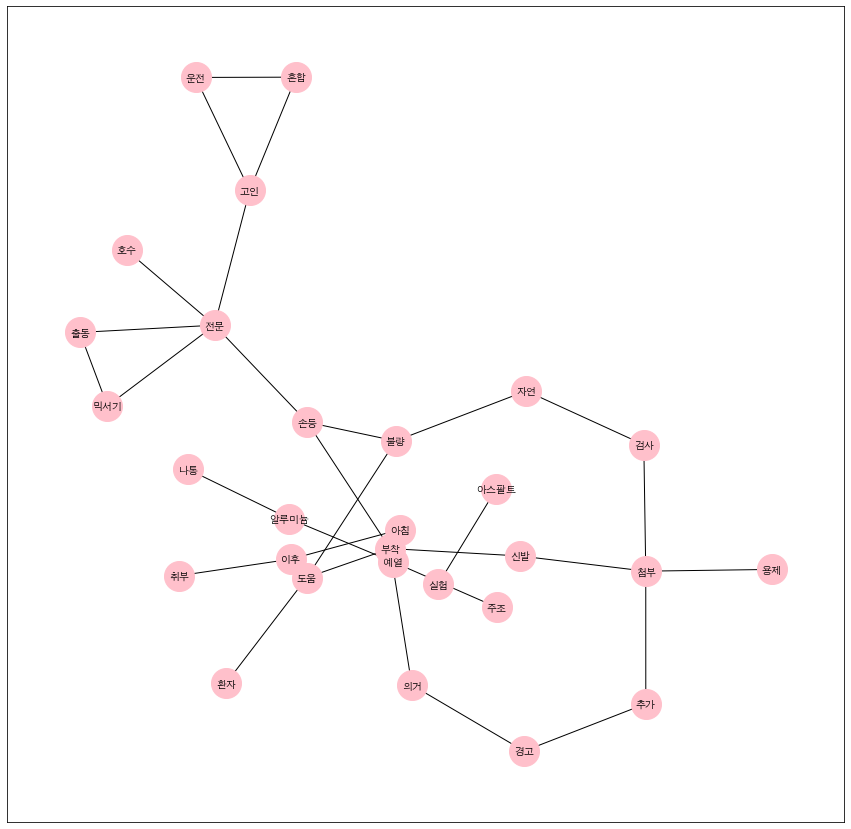

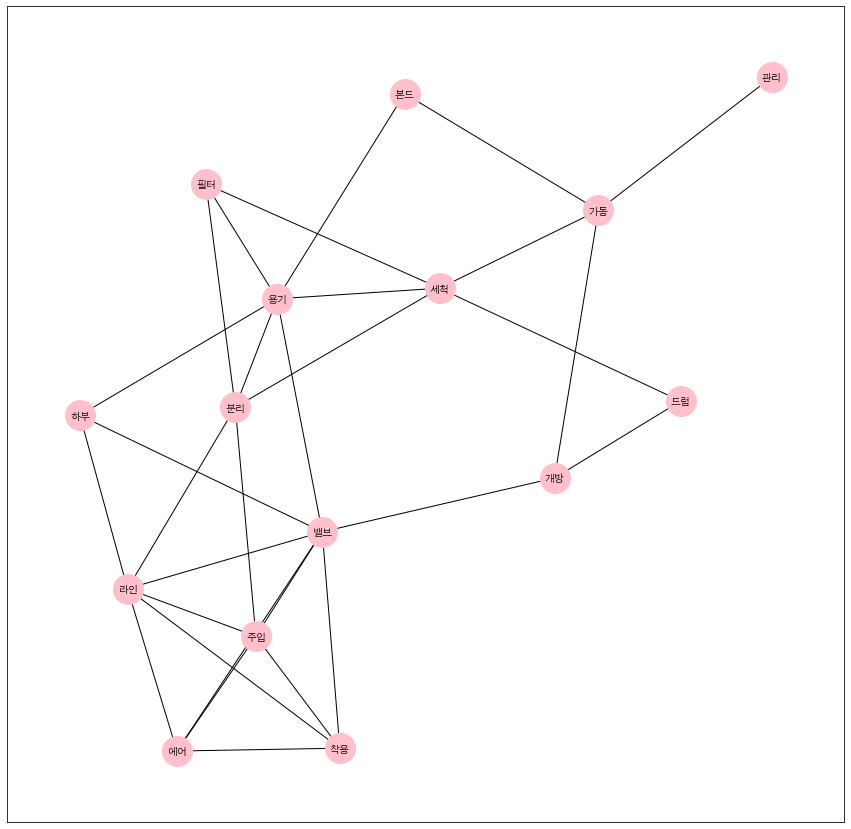

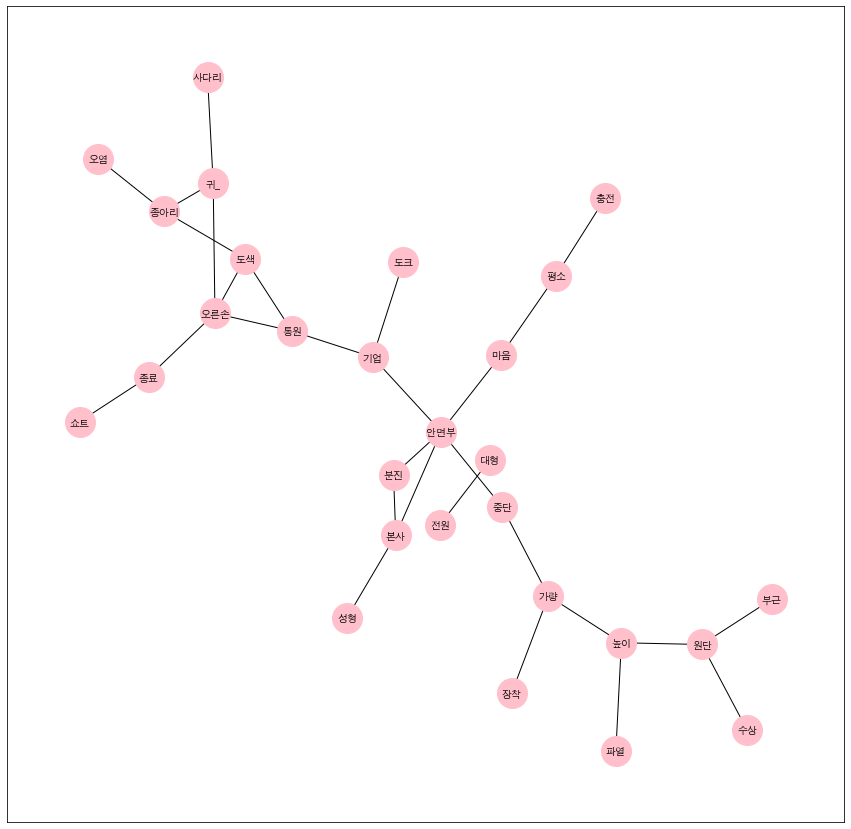

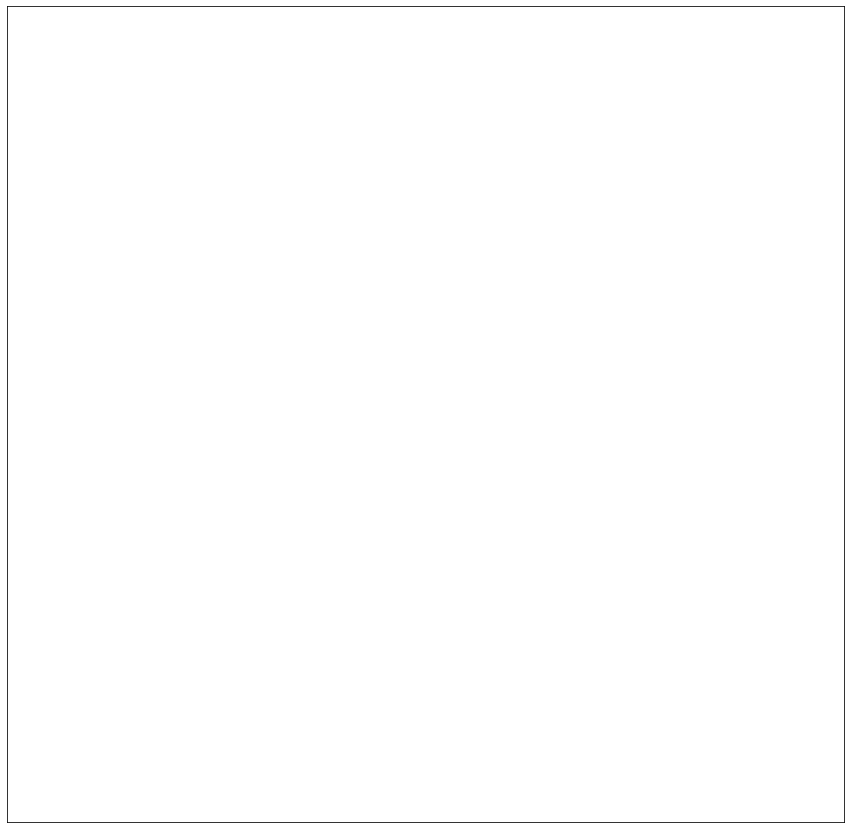

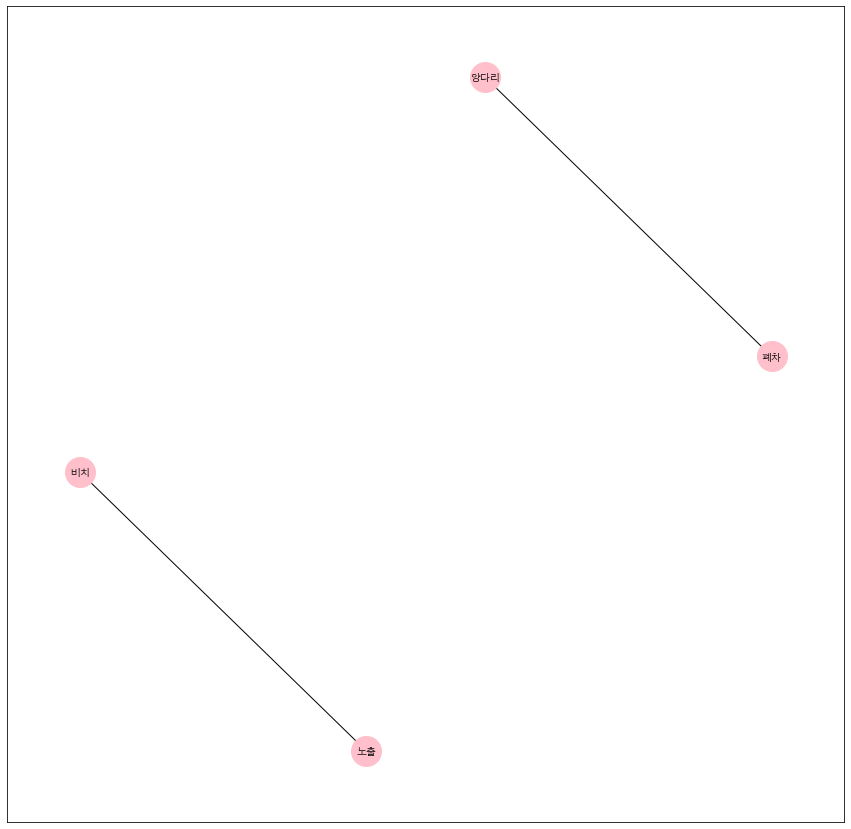

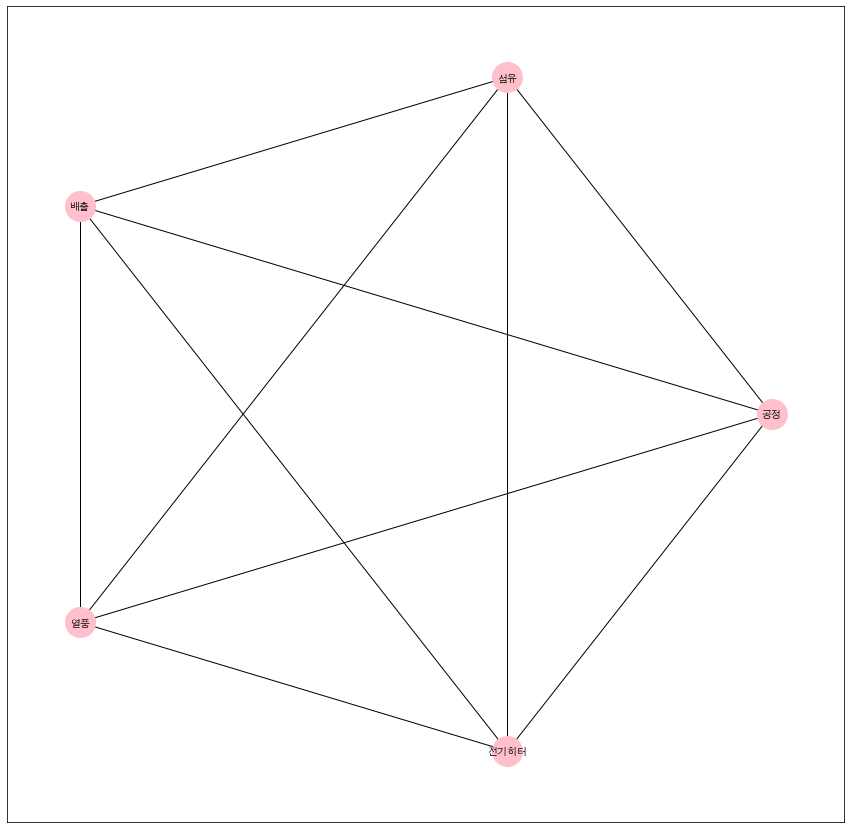

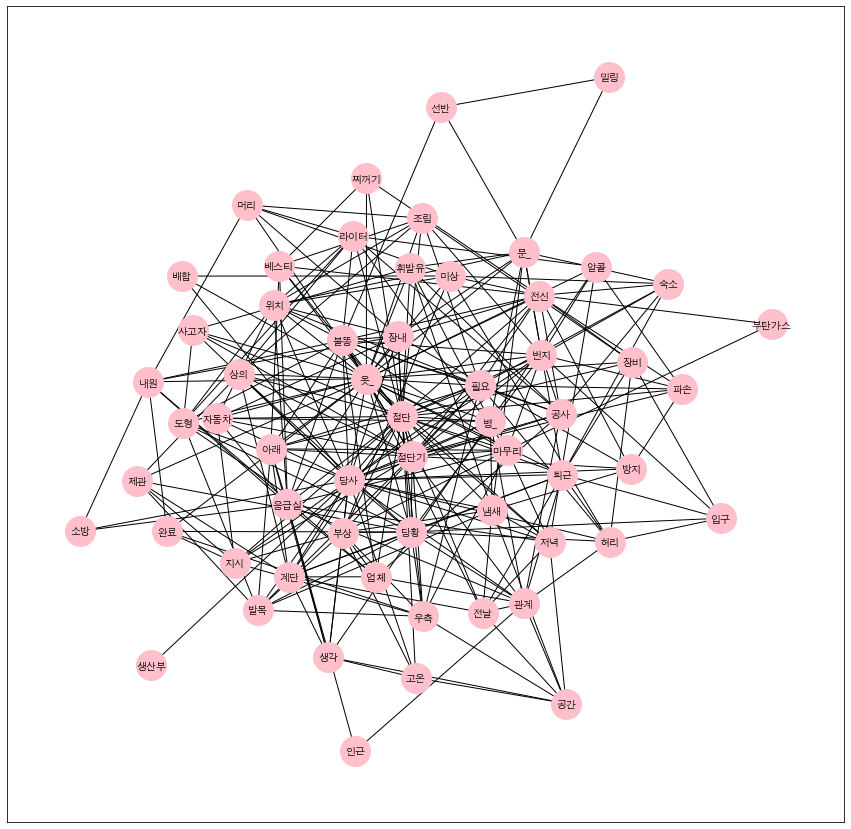

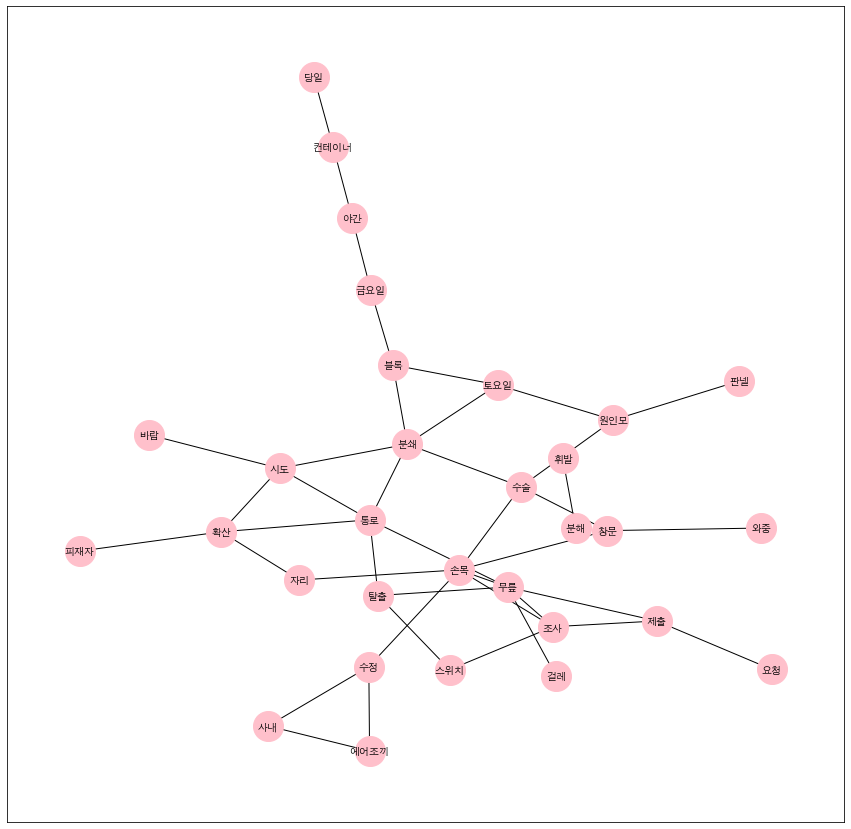

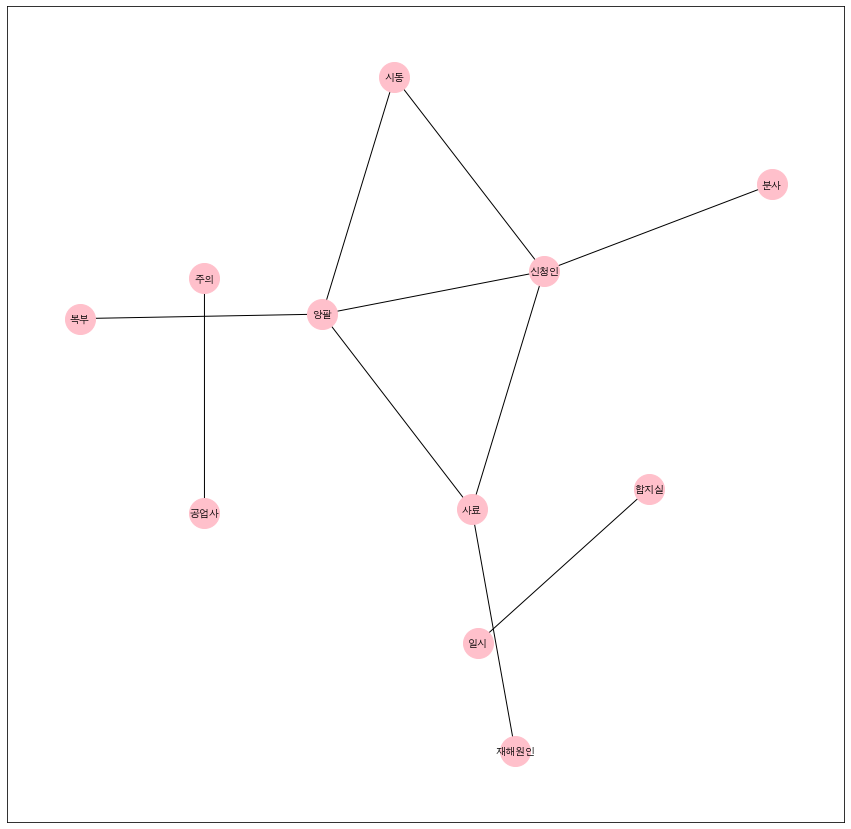

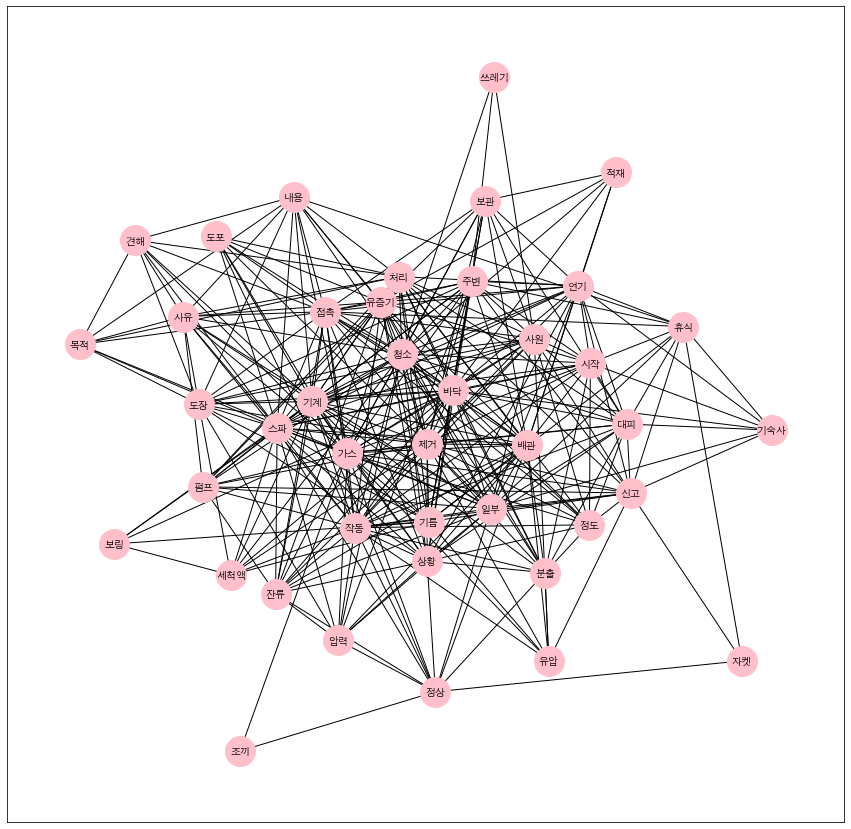

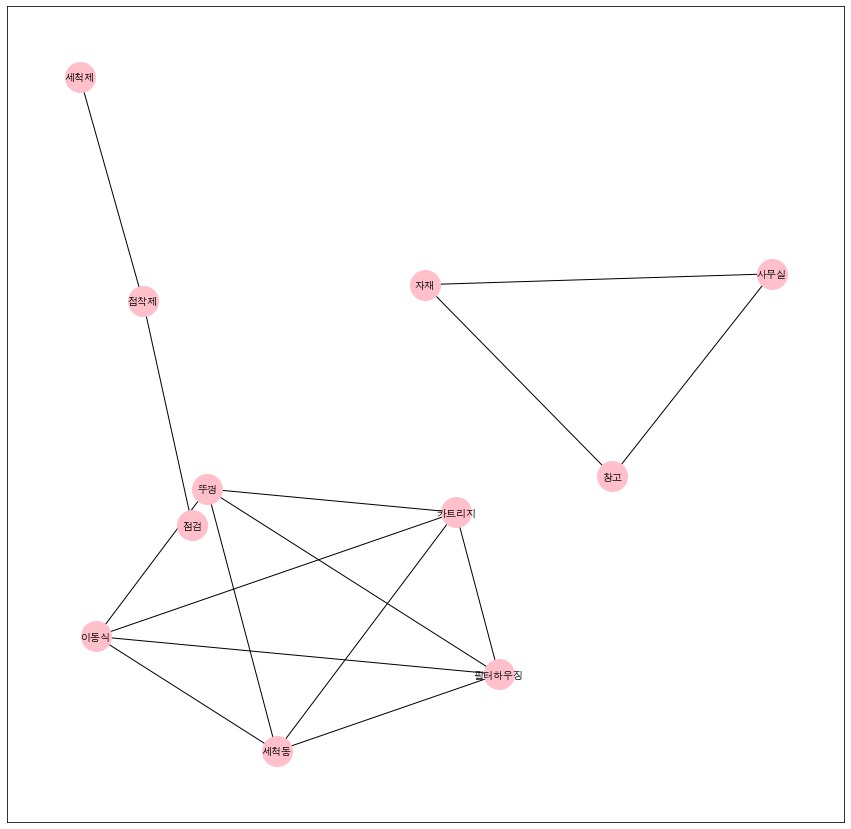

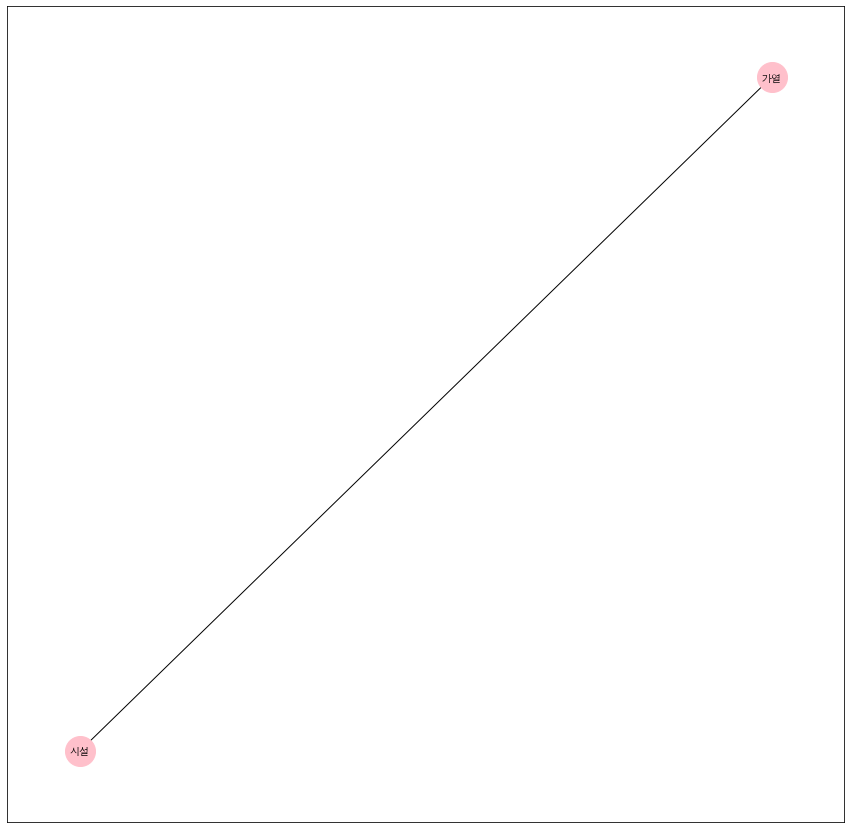

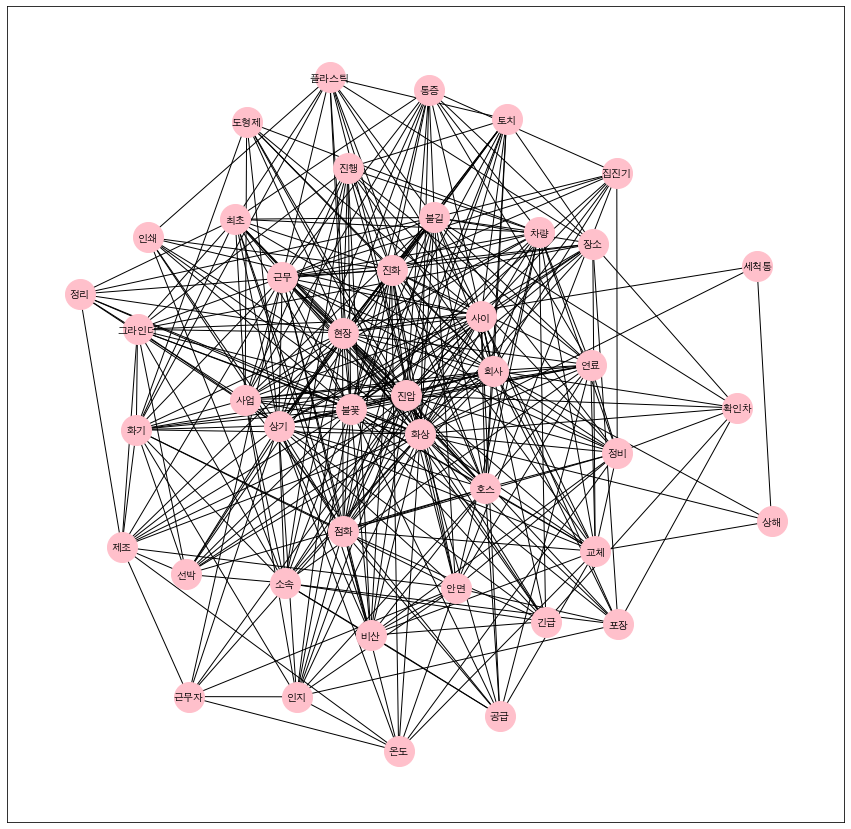

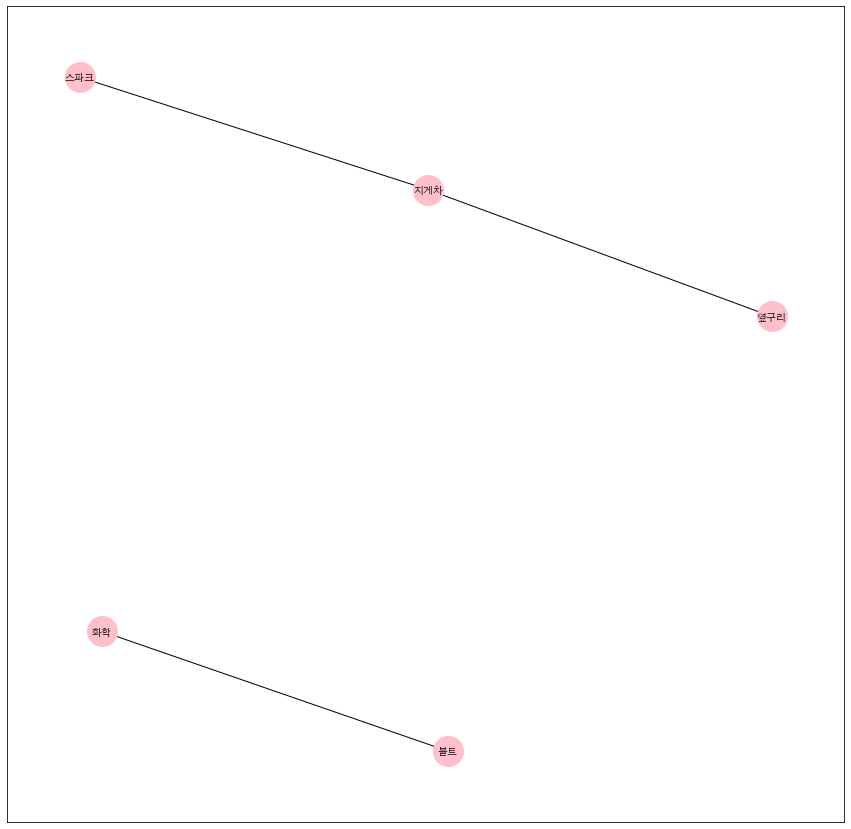

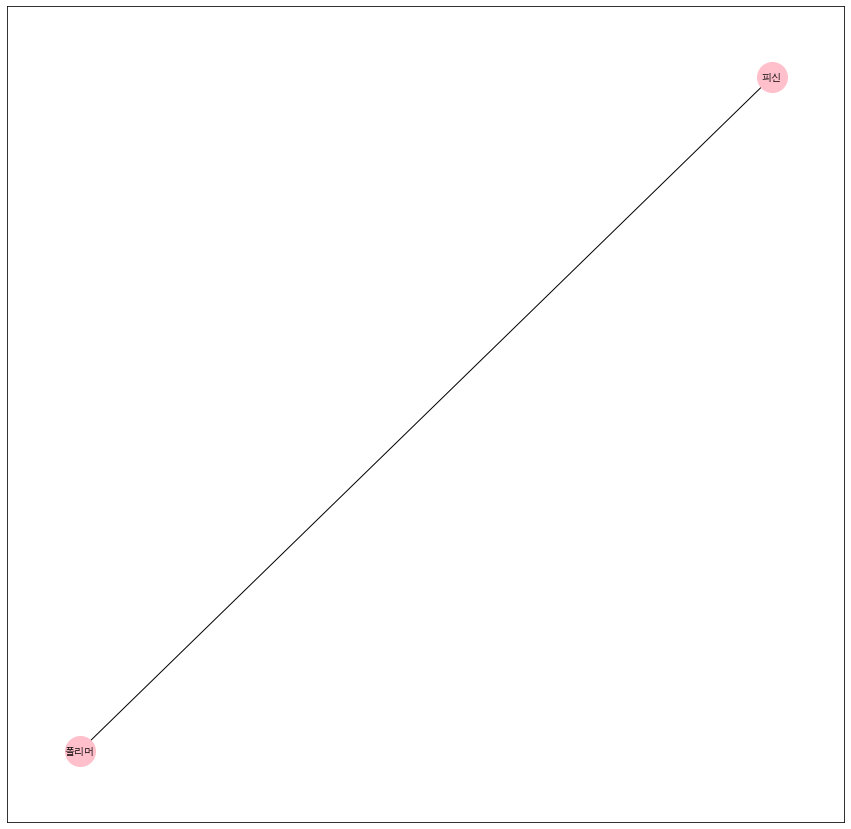

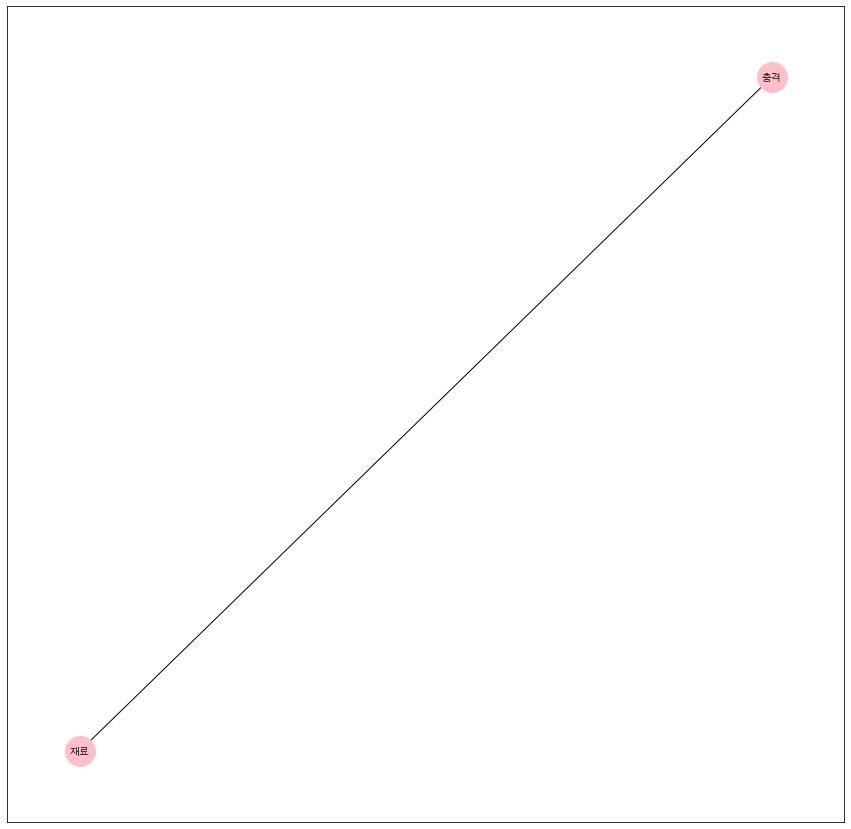

In [77]:
from collections import defaultdict
from networkx.algorithms.community import girvan_newman

for ci in range(0,n_clusters): # ci : cluster_index
    cluster_4= word_embeddings[word_embeddings['cluster']==ci] #cluster 별로 워드 임베딩 결과 필터링
    cluster_4['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화 

    for i in cluster_4.index:
        cluster_4.loc[i,'count'] = nouns_counter[i] #미리 분석한 빈도 수 결과를 데이터 프레임에 입력
        
    cluster_up100 = cluster_4.sort_values(by='count',ascending=False)[:100] # 빈도 수 별로 정렬 후 상위 100개 키워드 추출
#     cluster_up100.to_csv(sort_name+'cluster'+str(ci)+'_DTM.csv',encoding='utf-8-sig') 
    cluster_up100.drop(['cluster','count'],axis=1,inplace=True) # 네트워크 분석시 불필요한 컬럼 제거 

    
    
   
    idx =cluster_up100.index
    new_index = []
    for i in idx:  #동시단어 행렬을 만들기 위한 반복문
        if i in count_term_document_matrix.index:
            new_index.append(i)
            
    up_100_df = count_term_document_matrix.loc[new_index,new_index]
#     up_100_df.to_csv('동시단어출현_'+sort_name+'_cluster'+str(ci)+'.csv',encoding='utf-8-sig') 

    
    #네트워크 시각화를 위한 input 데이터를 만드는과정 
    dic = {}
    dic['word'] = []
    dic['toword'] = []
    dic['count'] = [] 

    count = defaultdict(int)

    idx = 1
    for col in up_100_df.columns:

        for col2 in up_100_df.columns[idx:]:
            score=up_100_df.loc[col,col2]
            if score<=0.80:
                continue
            dic['count'].append(score)

            dic['word'].append(col)
            dic['toword'].append(col2)

            count[col]+=1
            count[col2]+=1
        idx+=1

    daf = pd.DataFrame(dic) # dic to dataframe

    g = nx.from_pandas_edgelist(daf,'word','toword',)
    print(g)

    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(g,weight='count',k=1*1/np.sqrt(len(g.nodes())), iterations=50)

    pos=nx.kamada_kawai_layout(g,
    #                            dist=(2,3),
                               weight='count',
                               scale=10,
                               center=(0,5),
                               dim=2,)
    nx.draw_networkx(g, with_labels = True,
                     pos = pos,
                     node_color='pink',
                     node_size = 900,
                     font_color ='black',
                     font_weight ='bold',
                     font_size =10,
                     font_family = 'AppleGothic')
    # (g,pos,node_size=[800], node_color='pink', font_size=12,font_family='AppleGothic',)

    plt.savefig(sort_name+'_cluster'+str(ci)+'.png')

# plt.show()



In [78]:
#1,3번 기준으로 재클러스터링
re_ci=2
cluster_4= word_embeddings[word_embeddings['cluster']==re_ci]
cluster_4.drop('cluster',axis=1,inplace=True)
for i in cluster_4.index:
        cluster_4.loc[i,'count'] = nouns_counter[i] #미리 분석한 빈도 수 결과를 데이터 프레임에 입력
cluster_4=cluster_4.sort_values(by='count',ascending=False)[:100]
cluster_4

/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/1605938808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4.drop('cluster',axis=1,inplace=True)
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/1605938808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4.loc[i,'count'] = nouns_counter[i] #미리 분석한 빈도 수 결과를 데이터 프레임에 입력


,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,count
피해,-0.057704,0.008226,-0.003452,-0.030411,0.002145,-0.008267,-0.019399,0.032787,0.015531,-0.005390,...,-0.036377,-0.028454,-0.002203,0.004547,0.031912,-0.008750,0.041880,0.050819,0.044324,8.0
드럼통,-0.059569,0.009338,-0.003254,-0.029171,0.003514,-0.007467,-0.019972,0.032658,0.014508,-0.007057,...,-0.037689,-0.029581,-0.003180,0.006746,0.034467,-0.006979,0.044062,0.050266,0.043319,7.0
소방서,-0.058316,0.009495,-0.002478,-0.030124,0.001907,-0.007190,-0.019599,0.032951,0.015478,-0.007763,...,-0.036678,-0.027869,-0.003699,0.004907,0.032602,-0.008361,0.042822,0.051368,0.045044,7.0
재해발생,-0.057317,0.009665,-0.002521,-0.030317,0.002658,-0.007787,-0.018472,0.032789,0.014786,-0.007240,...,-0.036933,-0.029129,-0.002036,0.004801,0.033700,-0.008307,0.041783,0.049716,0.043619,6.0
시험,-0.059251,0.010244,-0.003500,-0.030283,0.002751,-0.007139,-0.018126,0.033201,0.014997,-0.006625,...,-0.038376,-0.028701,-0.004228,0.006038,0.032503,-0.007868,0.043646,0.051354,0.044228,6.0
철거,-0.057883,0.007809,-0.002834,-0.030359,0.003103,-0.007050,-0.017633,0.031243,0.014726,-0.007251,...,-0.037260,-0.027319,-0.004329,0.006348,0.032563,-0.006397,0.041448,0.049618,0.044293,6.0
가스통,-0.058578,0.009717,-0.003243,-0.030426,0.001674,-0.008445,-0.018527,0.032204,0.014090,-0.006503,...,-0.036822,-0.028008,-0.003949,0.005763,0.033409,-0.008177,0.043610,0.050367,0.043806,6.0
추락,-0.057199,0.010057,-0.003746,-0.029000,0.001327,-0.007954,-0.018113,0.032203,0.015864,-0.005588,...,-0.037647,-0.028494,-0.003813,0.004701,0.032247,-0.006624,0.041914,0.050048,0.043009,6.0
봉인,-0.059049,0.009974,-0.002930,-0.030563,0.003276,-0.008701,-0.020493,0.031622,0.014879,-0.005877,...,-0.037932,-0.028119,-0.002301,0.006286,0.032672,-0.008724,0.042978,0.050032,0.045319,6.0
자체,-0.057266,0.008833,-0.003384,-0.029414,0.001767,-0.007825,-0.018615,0.031963,0.014636,-0.005369,...,-0.036381,-0.027540,-0.002844,0.006347,0.032234,-0.006640,0.041031,0.048844,0.042390,6.0


In [79]:
cluster_4 = cluster_4.drop('count',axis=1)

In [80]:
cluster_4

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
피해,-0.057704,0.008226,-0.003452,-0.030411,0.002145,-0.008267,-0.019399,0.032787,0.015531,-0.005390,...,0.022359,-0.036377,-0.028454,-0.002203,0.004547,0.031912,-0.008750,0.041880,0.050819,0.044324
드럼통,-0.059569,0.009338,-0.003254,-0.029171,0.003514,-0.007467,-0.019972,0.032658,0.014508,-0.007057,...,0.022976,-0.037689,-0.029581,-0.003180,0.006746,0.034467,-0.006979,0.044062,0.050266,0.043319
소방서,-0.058316,0.009495,-0.002478,-0.030124,0.001907,-0.007190,-0.019599,0.032951,0.015478,-0.007763,...,0.022004,-0.036678,-0.027869,-0.003699,0.004907,0.032602,-0.008361,0.042822,0.051368,0.045044
재해발생,-0.057317,0.009665,-0.002521,-0.030317,0.002658,-0.007787,-0.018472,0.032789,0.014786,-0.007240,...,0.021816,-0.036933,-0.029129,-0.002036,0.004801,0.033700,-0.008307,0.041783,0.049716,0.043619
시험,-0.059251,0.010244,-0.003500,-0.030283,0.002751,-0.007139,-0.018126,0.033201,0.014997,-0.006625,...,0.022794,-0.038376,-0.028701,-0.004228,0.006038,0.032503,-0.007868,0.043646,0.051354,0.044228
철거,-0.057883,0.007809,-0.002834,-0.030359,0.003103,-0.007050,-0.017633,0.031243,0.014726,-0.007251,...,0.020472,-0.037260,-0.027319,-0.004329,0.006348,0.032563,-0.006397,0.041448,0.049618,0.044293
가스통,-0.058578,0.009717,-0.003243,-0.030426,0.001674,-0.008445,-0.018527,0.032204,0.014090,-0.006503,...,0.023083,-0.036822,-0.028008,-0.003949,0.005763,0.033409,-0.008177,0.043610,0.050367,0.043806
추락,-0.057199,0.010057,-0.003746,-0.029000,0.001327,-0.007954,-0.018113,0.032203,0.015864,-0.005588,...,0.021274,-0.037647,-0.028494,-0.003813,0.004701,0.032247,-0.006624,0.041914,0.050048,0.043009
봉인,-0.059049,0.009974,-0.002930,-0.030563,0.003276,-0.008701,-0.020493,0.031622,0.014879,-0.005877,...,0.021795,-0.037932,-0.028119,-0.002301,0.006286,0.032672,-0.008724,0.042978,0.050032,0.045319
자체,-0.057266,0.008833,-0.003384,-0.029414,0.001767,-0.007825,-0.018615,0.031963,0.014636,-0.005369,...,0.020729,-0.036381,-0.027540,-0.002844,0.006347,0.032234,-0.006640,0.041031,0.048844,0.042390


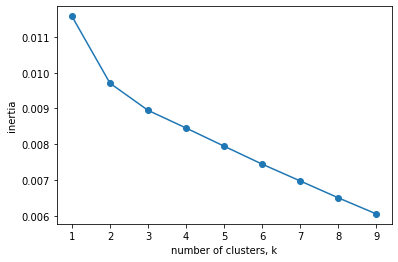

In [81]:
ks = range(1,10)

inertias = []

for k in ks:
    model2 = KMeans(n_clusters=k)
    model2.fit(cluster_4) #input data 
    inertias.append(model2.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.show()


In [82]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(cluster_4) # input data 

KMeans(n_clusters=4)

In [83]:
centers = kmeans.cluster_centers_ # 각 군집의 중심점
pred = kmeans.predict(cluster_4) # 각 예측군집
print(pd.DataFrame(centers))
print(pred[:10])


        0         1         2         3         4         5         6    \
0 -0.057764  0.009422 -0.003110 -0.029881  0.001924 -0.007751 -0.018398   
1 -0.059019  0.009342 -0.002838 -0.030050  0.002428 -0.007724 -0.019557   
2 -0.057082  0.008841 -0.002778 -0.029558  0.002817 -0.007775 -0.019151   
3 -0.058332  0.008626 -0.002247 -0.029342  0.002790 -0.008092 -0.018761   

        7         8         9    ...       790       791       792       793  \
0  0.032033  0.014786 -0.006725  ...  0.021874 -0.036883 -0.028841 -0.003203   
1  0.032937  0.015122 -0.006617  ...  0.022229 -0.037540 -0.028871 -0.003217   
2  0.031947  0.014621 -0.006330  ...  0.021500 -0.036741 -0.027917 -0.003263   
3  0.032706  0.014877 -0.005622  ...  0.021173 -0.037539 -0.028404 -0.002697   

        794       795       796       797       798       799  
0  0.005159  0.033291 -0.007722  0.042677  0.050242  0.043345  
1  0.005852  0.032650 -0.008071  0.042964  0.050925  0.044244  
2  0.006139  0.032464 -0.007002

In [84]:
cluster_4['cluster'] = pred
cluster_4

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,cluster
피해,-0.057704,0.008226,-0.003452,-0.030411,0.002145,-0.008267,-0.019399,0.032787,0.015531,-0.005390,...,-0.036377,-0.028454,-0.002203,0.004547,0.031912,-0.008750,0.041880,0.050819,0.044324,1
드럼통,-0.059569,0.009338,-0.003254,-0.029171,0.003514,-0.007467,-0.019972,0.032658,0.014508,-0.007057,...,-0.037689,-0.029581,-0.003180,0.006746,0.034467,-0.006979,0.044062,0.050266,0.043319,1
소방서,-0.058316,0.009495,-0.002478,-0.030124,0.001907,-0.007190,-0.019599,0.032951,0.015478,-0.007763,...,-0.036678,-0.027869,-0.003699,0.004907,0.032602,-0.008361,0.042822,0.051368,0.045044,1
재해발생,-0.057317,0.009665,-0.002521,-0.030317,0.002658,-0.007787,-0.018472,0.032789,0.014786,-0.007240,...,-0.036933,-0.029129,-0.002036,0.004801,0.033700,-0.008307,0.041783,0.049716,0.043619,0
시험,-0.059251,0.010244,-0.003500,-0.030283,0.002751,-0.007139,-0.018126,0.033201,0.014997,-0.006625,...,-0.038376,-0.028701,-0.004228,0.006038,0.032503,-0.007868,0.043646,0.051354,0.044228,1
철거,-0.057883,0.007809,-0.002834,-0.030359,0.003103,-0.007050,-0.017633,0.031243,0.014726,-0.007251,...,-0.037260,-0.027319,-0.004329,0.006348,0.032563,-0.006397,0.041448,0.049618,0.044293,2
가스통,-0.058578,0.009717,-0.003243,-0.030426,0.001674,-0.008445,-0.018527,0.032204,0.014090,-0.006503,...,-0.036822,-0.028008,-0.003949,0.005763,0.033409,-0.008177,0.043610,0.050367,0.043806,0
추락,-0.057199,0.010057,-0.003746,-0.029000,0.001327,-0.007954,-0.018113,0.032203,0.015864,-0.005588,...,-0.037647,-0.028494,-0.003813,0.004701,0.032247,-0.006624,0.041914,0.050048,0.043009,0
봉인,-0.059049,0.009974,-0.002930,-0.030563,0.003276,-0.008701,-0.020493,0.031622,0.014879,-0.005877,...,-0.037932,-0.028119,-0.002301,0.006286,0.032672,-0.008724,0.042978,0.050032,0.045319,1
자체,-0.057266,0.008833,-0.003384,-0.029414,0.001767,-0.007825,-0.018615,0.031963,0.014636,-0.005369,...,-0.036381,-0.027540,-0.002844,0.006347,0.032234,-0.006640,0.041031,0.048844,0.042390,2


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/561701360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi_cluster['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/561701360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi_cluster['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/561701360.py:60: RuntimeWarning: divide by zero encountered

Graph with 3 nodes and 2 edges
Graph with 0 nodes and 0 edges


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/561701360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi_cluster['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/561701360.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  pos = nx.spring_layout(g,weight='count',k=1*1/np.sqrt(len(g.nodes())), iterations=50)
/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_53857/561701360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Graph with 0 nodes and 0 edges
Graph with 0 nodes and 0 edges


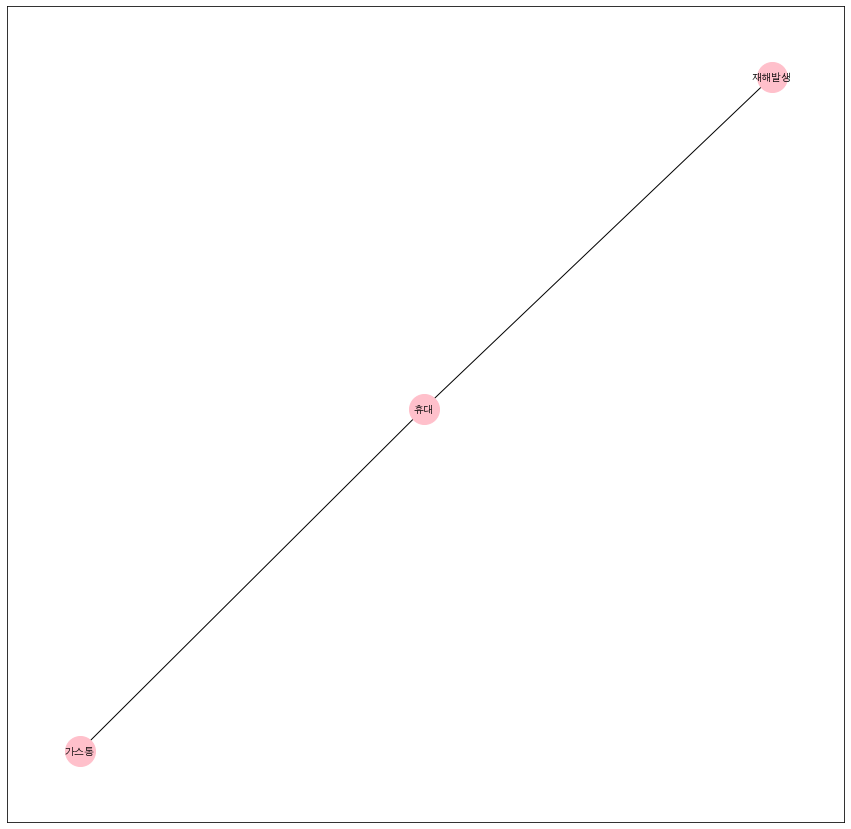

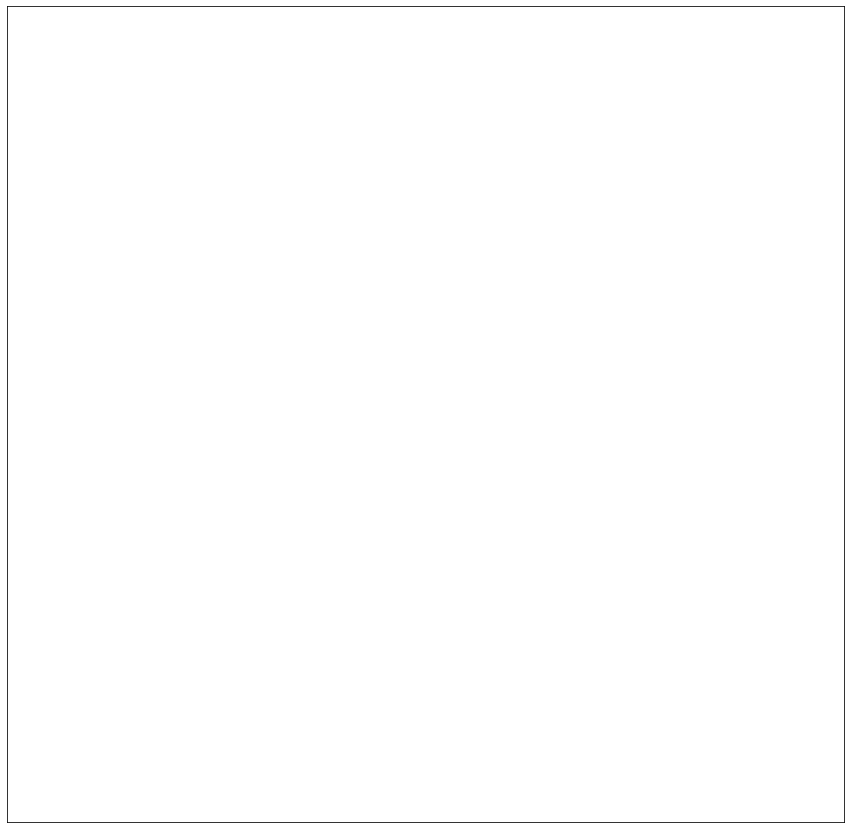

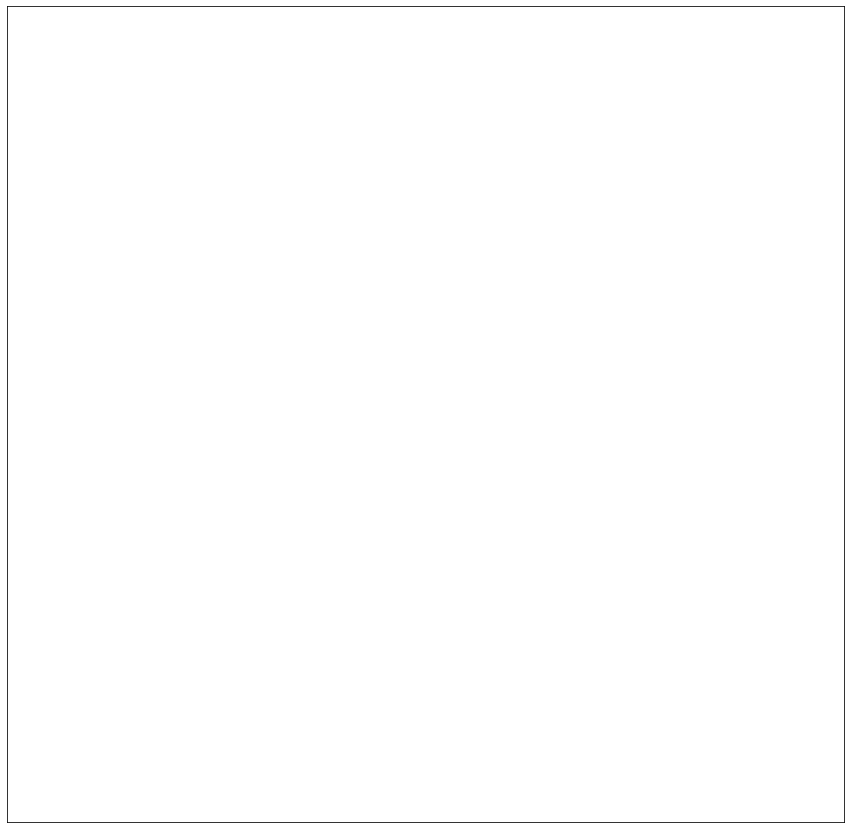

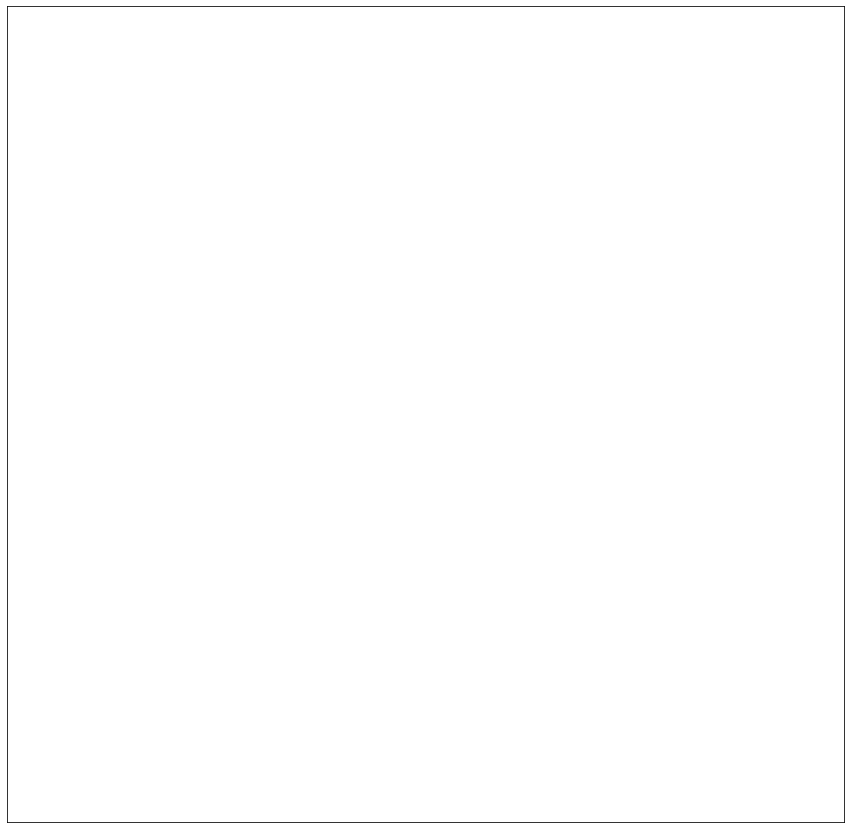

In [85]:
from collections import defaultdict
from networkx.algorithms.community import girvan_newman

for ci in range(0,n_clusters): # ci : cluster_index
    semi_cluster= cluster_4[cluster_4['cluster']==ci] #cluster 별로 워드 임베딩 결과 필터링
    semi_cluster['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화 

    for i in semi_cluster.index:
        semi_cluster.loc[i,'count'] = nouns_counter[i] #미리 분석한 빈도 수 결과를 데이터 프레임에 입력
        
    
    cluster_up100 = semi_cluster.sort_values(by='count',ascending=False)[:100] # 빈도 수 별로 정렬 후 상위 100개 키워드 추출
    cluster_up100.to_csv(sort_name+'_re_cluster'+str(ci)+'_re_DTM.csv',encoding='utf-8-sig') 
    cluster_up100.drop(['cluster','count'],axis=1,inplace=True) # 네트워크 분석시 불필요한 컬럼 제거 


    
    
   
    idx =cluster_up100.index
    new_index = []
    for i in idx:  #동시단어 행렬을 만들기 위한 반복문
        if i in count_term_document_matrix.index:
            new_index.append(i)
            
    up_100_df = count_term_document_matrix.loc[new_index,new_index]
    up_100_df.to_csv('동시단어출현_'+sort_name+'_re_cluster'+str(ci)+'.csv',encoding='utf-8-sig') 

    
    #네트워크 시각화를 위한 input 데이터를 만드는과정 
    dic = {}
    dic['word'] = []
    dic['toword'] = []
    dic['count'] = [] 

    count = defaultdict(int)

    idx = 1
    for col in up_100_df.columns:

        for col2 in up_100_df.columns[idx:]:
            score=up_100_df.loc[col,col2]
            if score<=0.80:
                continue
            dic['count'].append(score)

            dic['word'].append(col)
            dic['toword'].append(col2)

            count[col]+=1
            count[col2]+=1
        idx+=1

    daf = pd.DataFrame(dic) # dic to dataframe

    g = nx.from_pandas_edgelist(daf,'word','toword',)
    print(g)

    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(g,weight='count',k=1*1/np.sqrt(len(g.nodes())), iterations=50)

    pos=nx.kamada_kawai_layout(g,
    #                            dist=(2,3),
                               weight='count',
                               scale=10,
                               center=(0,5),
                               dim=2,)
    nx.draw_networkx(g, with_labels = True,
                     pos = pos,
                     node_color='pink',
                     node_size = 900,
                     font_color ='black',
                     font_weight ='bold',
                     font_size =10,
                     font_family = 'AppleGothic')
    # (g,pos,node_size=[800], node_color='pink', font_size=12,font_family='AppleGothic',)

    plt.savefig(sort_name+'_re_cluster'+str(ci)+'.png')

# plt.show()



In [171]:
cluster_4['cluster'].value_counts()

0    51
1    19
2    16
3    14
Name: cluster, dtype: int64

## 코사인 유사도입니다

In [168]:
# from sklearn.metrics.pairwise import cosine_similarity
# cosine_result = []
# for x in range(len(word_embeddings)):
#     tmp = []
#     for y in range(len(word_embeddings)):
#         A = np.array(word_embeddings.iloc[x])
#         B = np.array(word_embeddings.iloc[y])
#         result = cosine_similarity((A[:50]).reshape(1,-1),(B[:50]).reshape(1,-1))

#         tmp.append(result[0][0])
#     cosine_result.append(tmp)
# cosine_result_df = pd.DataFrame(cosine_result,index = cluster_up30.index,columns=cluster_up30.index)
# # cosine_result_df = pd.DataFrame(cosine_result)
# # cosine_result_df.to_csv('test.csv',encoding='utf-8-sig')

In [169]:
# # countvector 의 각 cluster의 wordcloud
# for index,keys in enumerate(df_cluster["cluster_label"]):
#     temp_morphs_list = []
#     for key in keys:
#         sentence_index = df[df["연번"] == key].index[0]
#         for i in sentence_nouns_list[sentence_index]:
#             temp_morphs_list.append(i)
#     nouns_counter = Counter(temp_morphs_list)
#     top_nouns = dict(nouns_counter.most_common(100))
#     start = 5
#     new_top_nouns = {}
#     for idx,tn in enumerate(top_nouns):
#         if idx < start-1:
   
#             continue
#         new_top_nouns[tn] = top_nouns[tn]
                             
    
#     wc = WordCloud(background_color="white",
#                    font_path='/Users/byeonghyeon/Documents/GitHub/IndustrialSystemsEngineering_Project/font/NanumBarunGothicBold.ttf')
    
#     wc = WordCloud(background_color="white",
#                    font_path='/Users/seop/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothicBold.otf')

#     wc.generate_from_frequencies(new_top_nouns)
# #     print(top_nouns)
# #     # World
# #     # 많이 나타나는 단어일수록 크게 나타남

#     figure = plt.figure()
#     figure.set_size_inches(10, 10)
#     ax = figure.add_subplot(1, 1, 1)
#     ax.axis("off")
#     ax.imshow(wc)
#     wc.to_file(filename="WC_K-Means_Word2Vec{}_wordembedding.png".format(index)) # to_file 함수
        

In [170]:

semi_cluster= cluster_4[cluster_4['cluster']==0] #cluster 별로 워드 임베딩 결과 필터링
semi_cluster['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화 

for i in semi_cluster.index:
    semi_cluster.loc[i,'count'] = nouns_counter[i] #미리 분석한 빈도 수 결과를 데이터 프레임에 입력

/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_25921/1255401328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi_cluster['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화


In [48]:
semi_cluster

,0,1,2,3,4,5,6,7,8,9,...,792,793,794,795,796,797,798,799,cluster,count
첨부,-0.068162,0.011073,-0.004774,-0.036058,0.002988,-0.010028,-0.023366,0.036620,0.016526,-0.007669,...,-0.033881,-0.003499,0.007239,0.037935,-0.007483,0.050284,0.060707,0.053921,0,16
분해,-0.072367,0.010892,-0.004041,-0.037076,0.002125,-0.010581,-0.022767,0.038879,0.019289,-0.006785,...,-0.034572,-0.003097,0.006653,0.041238,-0.010488,0.052899,0.060428,0.053471,0,14
수상,-0.065904,0.009674,-0.002262,-0.033634,0.003963,-0.008402,-0.022349,0.034765,0.016476,-0.005850,...,-0.032862,-0.004225,0.005517,0.035308,-0.008832,0.048478,0.055216,0.050384,0,13
사내,-0.070652,0.009908,-0.003839,-0.035842,0.004470,-0.009127,-0.025085,0.040846,0.018601,-0.009055,...,-0.035225,-0.004232,0.006124,0.040465,-0.008721,0.053564,0.062454,0.055624,0,13
호수,-0.069018,0.010243,-0.003601,-0.034588,0.004591,-0.008988,-0.024045,0.038864,0.016975,-0.007035,...,-0.033448,-0.002512,0.006616,0.037801,-0.008004,0.051561,0.059384,0.053362,0,12
혼합,-0.070479,0.010941,-0.003843,-0.034726,0.002122,-0.009886,-0.022667,0.038262,0.017053,-0.007026,...,-0.033808,-0.003984,0.005041,0.039481,-0.008234,0.052278,0.060753,0.052431,0,12
